In [1]:
import os
import itertools

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from gamtools import segregation, cosegregation
from gam_follow_up import config, utils, correlations, plotting

In [2]:
seg_1np_40kb = segregation.open_segregation(
    config.in_data_raw('1np-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [3]:
seg_3np_40kb = segregation.open_segregation(
    config.in_data_raw('multiplex-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [4]:
np.random.seed(64448)

In [5]:
seg_3np_insilico_40kb = utils.get_merged(seg_1np_40kb, 3)

In [6]:
correlation_distances = [(0, None), (0, 100)]

In [7]:
def correlate_split_reps(seg_table, distances=[(0, None)], split_n=None, no_reps=5):
    corr_out = []

    for _ in range(no_reps):

        seg_a, seg_b = utils.split_df(seg_table, split_n)

        res = correlations.correlate_from_seg_tables(
            seg_a, seg_b, distances)

        corr_out.append(res)

    return np.array(corr_out)

In [8]:
corr_80x1_path = config.in_data_intermediate(
    'correlations/80x1np.corr.npz')

if not os.path.exists(corr_80x1_path):
    corr_80x1np = []

    for _ in range(5):

        seg_80x1np_a, seg_80x1np_b = utils.split_df(seg_1np_40kb, 80)

        res = correlations.correlate_from_seg_tables(
            seg_80x1np_a, seg_80x1np_b, correlation_distances)

        corr_80x1np.append(res)

    np.savez_compressed(corr_80x1_path, corrs=np.array(corr_80x1np))

corr_80x1np = np.load(corr_80x1_path)['corrs']

In [9]:
corr_240x1_path = config.in_data_intermediate(
    'correlations/240x1np.corr.npz')

if not os.path.exists(corr_240x1_path):
    corr_240x1np = []

    for _ in range(5):

        seg_240x1np_a, seg_240x1np_b = utils.split_df(seg_1np_40kb, 240)

        res = correlations.correlate_from_seg_tables(
            seg_240x1np_a, seg_240x1np_b, correlation_distances)

        corr_240x1np.append(res)

    np.savez_compressed(corr_240x1_path, corrs=np.array(corr_240x1np))

corr_240x1np = np.load(corr_240x1_path)['corrs']

In [10]:
corr_80x3is_path = config.in_data_intermediate(
    'correlations/80x3np_insilico.corr.npz')

if not os.path.exists(corr_80x3is_path):
    corr_80x3_np_insilico = []

    for _ in range(5):

        seg_80x3np_a, seg_80x3np_b = utils.split_df(seg_3np_insilico_40kb, 80)

        res = correlations.correlate_from_seg_tables(
            seg_80x3np_a, seg_80x3np_b, correlation_distances)

        corr_80x3_np_insilico.append(res)

    np.savez_compressed(corr_80x3is_path, corrs=np.array(corr_80x3_np_insilico))

corr_80x3_np_insilico = np.load(corr_80x3is_path)['corrs']

In [11]:
corr_80x3_path = config.in_data_intermediate(
    'correlations/80x3np.corr.npz')

if not os.path.exists(corr_80x3_path):
    corr_80x3_np = []

    for _ in range(5):

        seg_80x3np_a, seg_80x3np_b = utils.split_df(seg_3np_40kb, 80)

        res = correlations.correlate_from_seg_tables(
            seg_80x3np_a, seg_80x3np_b, correlation_distances)

        corr_80x3_np.append(res)

    np.savez_compressed(corr_80x3_path, corrs=np.array(corr_80x3_np))

corr_80x3_np = np.load(corr_80x3_path)['corrs']

In [12]:
corr_mixed_path = config.in_data_intermediate(
    'correlations/mixed_nps.corr.npz')

if not os.path.exists(corr_mixed_path):
    corr_mixed_np = []

    for _ in range(5):

        seg_49x3np_a, seg_49x3np_b = utils.split_df(seg_3np_40kb, 49)
        seg_93x1np_a, seg_93x1np_b = utils.split_df(seg_1np_40kb, 93)

        seg_mixed_a = pd.concat([seg_93x1np_a, seg_49x3np_a], axis=1)
        seg_mixed_b = pd.concat([seg_93x1np_b, seg_49x3np_b], axis=1)

        res = correlations.correlate_from_seg_tables(
            seg_mixed_a, seg_mixed_b, correlation_distances)

        corr_mixed_np.append(res)

    np.savez_compressed(corr_mixed_path, corrs=np.array(corr_mixed_np))

corr_mixed_np = np.load(corr_mixed_path)['corrs']

/gpfs3/well/beagrie/users/idv763/gam-to-transfer/multiplex-gam-2022/env-skylake/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/gpfs3/well/beagrie/users/idv763/gam-to-transfer/multiplex-gam-2022/env-skylake/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Pearson correlation')

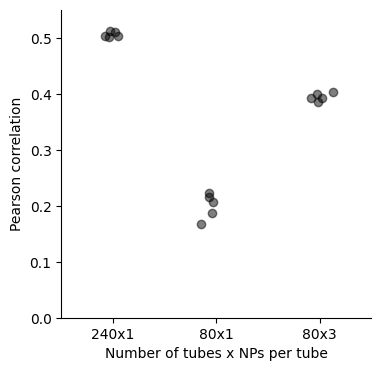

In [13]:
plt.figure(figsize=(4, 4))

data = [
            corr_240x1np[:,1,:].mean(axis=1),
            corr_80x1np[:,1,:].mean(axis=1),
            corr_80x3_np_insilico[:,1,:].mean(axis=1),
        ]

plotting.dotplot(data, color='black', alpha=0.5)

plt.xlim(-0.5, 2.5)
plt.ylim(0, 0.55)

plotting.simpleaxis()

plt.xticks(range(3), ['240x1', '80x1', '80x3'])
plt.xlabel('Number of tubes x NPs per tube')
plt.ylabel('Pearson correlation')

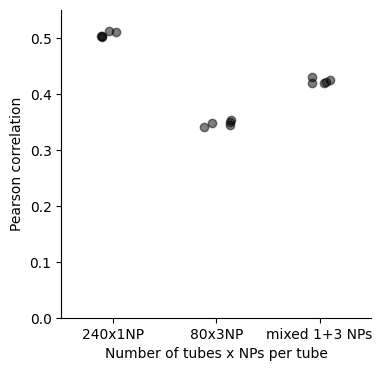

In [17]:
plt.figure(figsize=(4, 4))

data =[
            corr_240x1np[:,1,:].mean(axis=1),
            corr_80x3_np[:,1,:].mean(axis=1),
            corr_mixed_np[:,1,:].mean(axis=1),
        ]

plotting.dotplot(data, color='black', alpha=0.5)

plt.xlim(-0.5, 2.5)
plt.ylim(0, 0.55)

plt.xticks(range(3), ['240x1NP', '80x3NP', 'mixed 1+3 NPs'])
plt.xlabel('Number of tubes x NPs per tube')
plt.ylabel('Pearson correlation')

plotting.simpleaxis()
